In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train = pd.read_csv('/content/fraudTrain.csv')
test = pd.read_csv('/content/fraudTest.csv')
data = pd.concat([train, test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,202025.000000,2.020240e+05,202023.000000,202023.000000,202023.000000,202023.000000,2.020230e+05,2.020230e+05,202023.000000,202023.000000,202023.000000
mean,65097.264339,4.182545e+17,69.960596,48812.681051,38.545359,-90.227632,8.841559e+04,1.363135e+09,38.544836,-90.228781,0.005524
std,45949.413664,1.310324e+18,150.031534,26895.405885,5.075179,13.781288,2.995768e+05,2.009239e+07,5.110152,13.795262,0.074119
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.671575,0.000000
25%,25252.000000,1.800429e+14,9.670000,26237.000000,34.668900,-96.798000,7.410000e+02,1.371906e+09,34.762704,-96.909997,0.000000
50%,54294.000000,3.519607e+15,47.520000,48174.000000,39.371600,-87.461600,2.408000e+03,1.373425e+09,39.375396,-87.409615,0.000000
75%,104800.000000,4.634956e+15,83.175000,72042.000000,41.940400,-80.158000,2.032800e+04,1.374951e+09,41.955157,-80.239508,0.000000
max,155306.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.376512e+09,66.669356,-66.952352,1.000000


In [ ]:
print(train.shape)
print(test.shape)

(46718, 23)
(155307, 23)


In [ ]:
train.isna().sum()

Unnamed: 0               0
trans_date_trans_time    1
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
test.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
display(data.head())
print(data.describe())
print(data.isna().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


          Unnamed: 0        cc_num            amt            zip  \
count  202025.000000  2.020240e+05  202023.000000  202023.000000   
mean    65097.264339  4.182545e+17      69.960596   48812.681051   
std     45949.413664  1.310324e+18     150.031534   26895.405885   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%     25252.000000  1.800429e+14       9.670000   26237.000000   
50%     54294.000000  3.519607e+15      47.520000   48174.000000   
75%    104800.000000  4.634956e+15      83.175000   72042.000000   
max    155306.000000  4.992346e+18   13149.150000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  202023.000000  202023.000000  2.020230e+05  2.020230e+05   
mean       38.545359     -90.227632  8.841559e+04  1.363135e+09   
std         5.075179      13.781288  2.995768e+05  2.009239e+07   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.668900     -96.798000  7.410000e+02  1

In [ ]:
test.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time               cc_num  \
0                0   2020-06-21 12:14:25     2291163933867244   
1                1   2020-06-21 12:14:33     3573030041201292   
2                2   2020-06-21 12:14:53     3598215285024754   
3                3   2020-06-21 12:15:15     3591919803438423   
4                4   2020-06-21 12:15:17     3526826139003047   
...            ...                   ...                  ...   
155302      155302   2020-08-14 20:32:22  4512828414983801773   
155303      155303   2020-08-14 20:32:44      343464013864032   
155304      155304   2020-08-14 20:32:44     6011934240159560   
155305      155305   2020-08-14 20:33:59      180018375329178   
155306      155306   2020-08-14 20:34:38       30238755902988   

                                    merchant        category    amt     first  \
0                      fraud_Kirlin and Sons   personal_care   2.86      Jeff   
1                       fraud_Sporer-Keebler   personal_care  29.84    Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28    Ashley   
3                          fraud_Haley Group        misc_pos  60.05     Brian   
4                      fraud_Johnston-Casper          travel   3.19    Nathan   
...                                      ...             ...    ...       ...   
155302                      fraud_Little Ltd       kids_pets  20.90    Monica   
155303                 fraud_Kutch-Wilderman            home  28.91      Jodi   
155304                  fraud_McKenzie-Huels     food_dining  58.99    Joshua   
155305                    fraud_Bins-Tillman   entertainment  74.58  Michelle   
155306        fraud_Ferry, Lynch and Kautzer             mis    NaN       NaN   

            last gender                       street  ...      lat      long  \
0        Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1       Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2          Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3       Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4         Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...          ...    ...                          ...  ...      ...       ...   
155302     Cohen      F          864 Reynolds Plains  ...  39.8936  -79.7856   
155303    Foster      F          551 Zachary Freeway  ...  35.8072  -78.0892   
155304     Cohen      M               426 Mark Ports  ...  44.2541  -68.5565   
155305     Woods      F        952 Joseph Throughway  ...  42.3703  -84.2485   
155306       NaN    NaN                          NaN  ...      NaN       NaN   

        city_pop                              job         dob  \
0       333497.0              Mechanical engineer  1968-03-19   
1          302.0           Sales professional, IT  1990-01-17   
2        34496.0                Librarian, public  1970-10-21   
3        54767.0                     Set designer  1987-07-25   
4         1126.0               Furniture designer  1955-07-06   
...          ...                              ...         ...   
155302     328.0                     Tree surgeon  1983-07-25   
155303    6629.0              Call centre manager  1962-08-13   
155304     824.0         Loss adjuster, chartered  1974-11-02   
155305    2523.0  Geophysicist/field seismologist  1988-03-21   
155306       NaN                              NaN         NaN   

                               trans_num     unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1.371817e+09  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1.371817e+09  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1.371817e+09  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1.371817e+09  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1.371817e+09  44.959148  

In [ ]:
train.info

<bound method DataFrame.info of        Unnamed: 0 trans_date_trans_time        cc_num  \
0               0   2019-01-01 00:00:18  2.703186e+15   
1               1   2019-01-01 00:00:44  6.304233e+11   
2               2   2019-01-01 00:00:51  3.885949e+13   
3               3   2019-01-01 00:01:16  3.534094e+15   
4               4   2019-01-01 00:03:06  3.755342e+14   
...           ...                   ...           ...   
46713       46713   2019-01-28 14:41:30  4.897068e+18   
46714       46714   2019-01-28 14:41:33  4.488941e+15   
46715       46715   2019-01-28 14:41:56  6.592075e+15   
46716       46716   2019-01-28 14:42:41  4.634956e+15   
46717        4671                   NaN           NaN   

                                 merchant        category     amt       first  \
0              fraud_Rippin, Kub and Mann        misc_net    4.97    Jennifer   
1         fraud_Heller, Gutmann and Zieme     grocery_pos  107.23   Stephanie   
2                    fraud_Lind-Buckridge   entertainment  220.11      Edward   
3      fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      Jeremy   
4                     fraud_Keeling-Crist        misc_pos   41.96       Tyler   
...                                   ...             ...     ...         ...   
46713    fraud_Pouros, Walker and Spencer       kids_pets   18.51       Randy   
46714   fraud_Watsica, Haag and Considine    shopping_pos    4.73  Jacqueline   
46715                  fraud_Roob-Okuneva  health_fitness   83.31      Amanda   
46716                    fraud_Barton LLC       kids_pets   39.45   Mackenzie   
46717                                 NaN             NaN     NaN         NaN   

             last gender                        street  ...      lat  \
0           Banks      F                561 Perry Cove  ...  36.0788   
1            Gill      F  43039 Riley Greens Suite 393  ...  48.8878   
2         Sanchez      M      594 White Dale Suite 530  ...  42.1808   
3           White      M   9443 Cynthia Court Apt. 038  ...  46.2306   
4          Garcia      M              408 Bradley Rest  ...  38.4207   
...           ...    ...                           ...  ...      ...   
46713        Wood      M     542 Howe Mission Apt. 092  ...  28.3011   
46714  Washington      F   138 Stephen Ridges Apt. 978  ...  28.9254   
46715      Molina      F  8425 Daniel Knolls Suite 288  ...  40.0897   
46716       Smith      F             7178 Willis Drive  ...  41.6414   
46717         NaN    NaN                           NaN  ...      NaN   

           long   city_pop                                job         dob  \
0      -81.1781     3495.0          Psychologist, counselling  1988-03-09   
1     -118.2105      149.0  Special educational needs teacher  1978-06-21   
2     -112.2620     4154.0        Nature conservation officer  1962-01-19   
3     -112.1138     1939.0                    Patent attorney  1967-01-12   
4      -79.4629       99.0     Dance movement psychotherapist  1986-03-28   
...         ...        ...                                ...         ...   
46713  -82.6927    42619.0    Environmental education officer  1975-10-07   
46714  -81.6801    11432.0              Private music teacher  1986-03-31   
46715  -74.9781  1526206.0          Commercial horticulturist  1972-05-23   
46716  -96.5232     1745.0               Engineer, automotive  1973-12-26   
46717       NaN        NaN                                NaN         NaN   

                              trans_num     unix_time  merch_lat  merch_long  \
0      0b242abb623afc578575680df30655b9  1.325376e+09  36.011293  -82.048315   
1      1f76529f8574734946361c461b024d99  1.325376e+09  49.159047 -118.186462   
2      a1a22d70485983eac12b5b88dad1cf95  1.325376e+09  43.150704 -112.154481   
3      6b849c168bdad6f867558c3793159a81  1.325376e+09  47.034331 -112.561071   
4      a41d7549acf90789359a9aa5346dcb46  1.325376e+09  38.674999  -78.632459   
...                                 ... 

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
label_encode_cols = ['merchant','category','gender','state','job']
for col in label_encode_cols:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoders[col] = le

  train[col] = le.fit_transform(train[col])
  label_encoders[col] = le

  test[col] = le.fit_transform(test[col])
  label_encoders[col] = le

In [ ]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day
data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])

train['transaction_year'] = train['trans_date_trans_time'].dt.year
train['transaction_month'] = train['trans_date_trans_time'].dt.month
train['transaction_day'] = train['trans_date_trans_time'].dt.day
train['transaction_hour'] = train['trans_date_trans_time'].dt.hour

train['birth_year'] = train['dob'].dt.year
train['birth_month'] = train['dob'].dt.month
train['birth_day'] = train['dob'].dt.day

train.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])

test['transaction_year'] = test['trans_date_trans_time'].dt.year
test['transaction_month'] = test['trans_date_trans_time'].dt.month
test['transaction_day'] = test['trans_date_trans_time'].dt.day
test['transaction_hour'] = test['trans_date_trans_time'].dt.hour
test['birth_year'] = test['dob'].dt.year
test['birth_month'] = test['dob'].dt.month
test['birth_day'] = test['dob'].dt.day

test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [ ]:
data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [ ]:
print(train.shape)
print(test.shape)
print(data.shape)

(46718, 23)
(155307, 23)
(202025, 23)


In [ ]:
print(data.head(0))
print(data.head())
print(data.describe())
print(data.isna().sum())

Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, transaction_year, transaction_month, transaction_day, transaction_hour, birth_year, birth_month, birth_day]
Index: []

[0 rows x 23 columns]
   Unnamed: 0        cc_num  merchant  category     amt  gender  state  \
0           0  2.703186e+15       514         9    4.97       0     26   
1           1  6.304233e+11       241         4  107.23       0     46   
2           2  3.885949e+13       390         0  220.11       1     12   
3           3  3.534094e+15       360         2   45.00       1     25   
4           4  3.755342e+14       297        10   41.96       1     44   

       zip      lat      long  ...  merch_lat  merch_long  is_fraud  \
0  28654.0  36.0788  -81.1781  ...  36.011293  -82.048315       0.0   
1  99160.0  48.8878 -118.2105  ...  49.159047 -118.186462       0.0   
2  83252.0  42.1808 -112.2620  ...  43.1

In [ ]:
import pandas as pd

# Load the dataset
file_path1 = '/content/fraudTrain.csv'
file_path2 = '/content/fraudTest.csv'
data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)
# Display the first few rows of the dataset to understand its structure
data1.head()
data2.head()
# Check for missing values
missing_values_before = data1.isnull().sum()
missing_values_before = data2.isnull().sum()
# Handle missing values
# Option: Drop rows with any missing values
data1_cleaned = data1.dropna()
data2_cleaned = data2.dropna()

# Check for duplicates
duplicates_before1 = data1_cleaned.duplicated().sum()
duplicates_before2 = data2_cleaned.duplicated().sum()
# Remove duplicates
data1_cleaned.drop_duplicates(inplace=True)
data2_cleaned.drop_duplicates(inplace=True)

# Check the column names and identify the correct datetime column
print(data1_cleaned.columns)

# Convert the correct datetime column to datetime objects
# Replace 'actual_datetime_column' with the name of the column containing datetime values
data1_cleaned['trans_date_trans_time'] = pd.to_datetime(data1_cleaned['trans_date_trans_time'])
data2_cleaned['trans_date_trans_time'] = pd.to_datetime(data2_cleaned['trans_date_trans_time'])


# Final dataset check
missing_values_after = data1_cleaned.isnull().sum()
missing_values_after = data2_cleaned.isnull().sum()
data3 = pd.concat([data1_cleaned, data2_cleaned])
data3.info()

# Save the cleaned dataset to a new file
# Specify the correct file path for saving
cleaned_file_path = "Cleaned_data_set.csv"
data3.to_csv(cleaned_file_path, index=False)  # Use data3 to save the concatenated data
missing_values_before, missing_values_after, data3.info(), data3.head() # Use data3 for final checks

<ipython-input-18-ec2ce1837aad>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_cleaned.drop_duplicates(inplace=True)
<ipython-input-18-ec2ce1837aad>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_cleaned.drop_duplicates(inplace=True)
<ipython-input-18-ec2ce1837aad>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_cleaned['trans_date_trans_time'] = pd.to_d

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 202023 entries, 0 to 155305
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             202023 non-null  int64         
 1   trans_date_trans_time  202023 non-null  datetime64[ns]
 2   cc_num                 202023 non-null  float64       
 3   merchant               202023 non-null  object        
 4   category               202023 non-null  object        
 5   amt                    202023 non-null  float64       
 6   first                  202023 non-null  object        
 7   last                   202023 non-null  object     

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      1
 first                    1
 last                     1
 gender                   1
 street                   1
 city                     1
 state                    1
 zip                      1
 lat                      1
 long                     1
 city_pop                 1
 job                      1
 dob                      1
 trans_num                1
 unix_time                1
 merch_lat                1
 merch_long               1
 is_fraud                 1
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

In [ ]:
data3.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

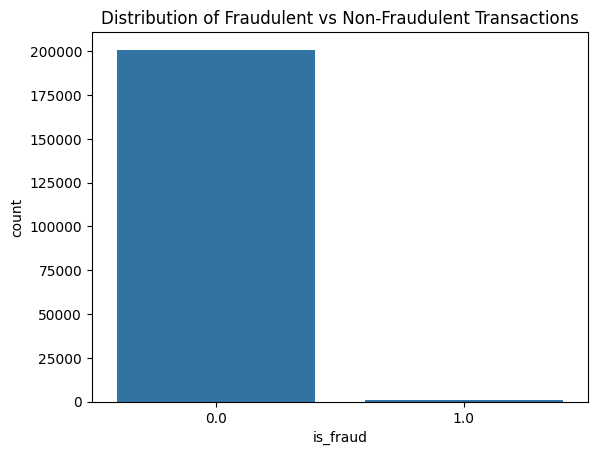

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(data=data3, x ='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

In [ ]:
print(data3.index.duplicated().sum())
data = data3.reset_index(drop=True)
print(data3.index.duplicated().sum())

46717
46717


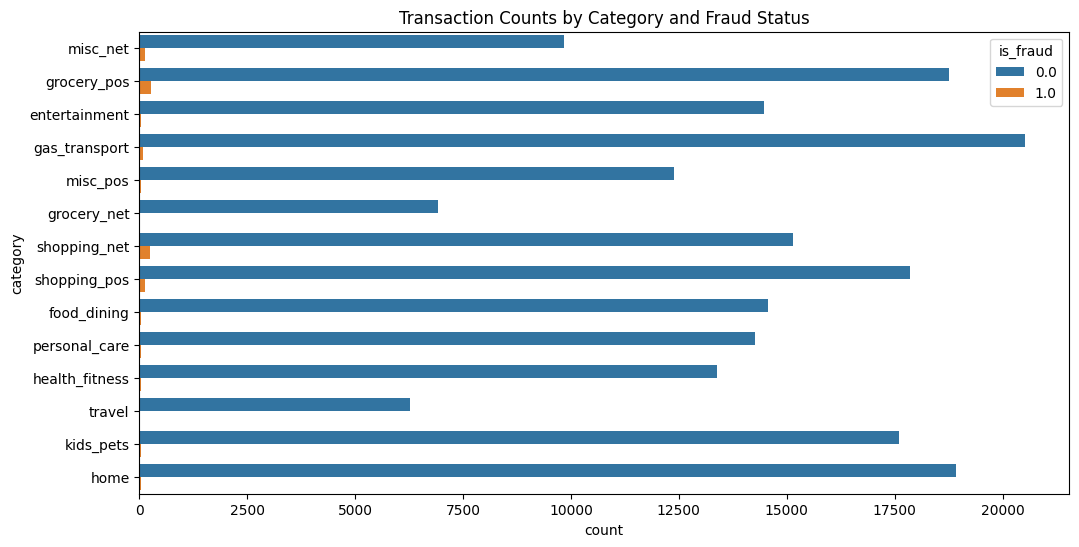

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

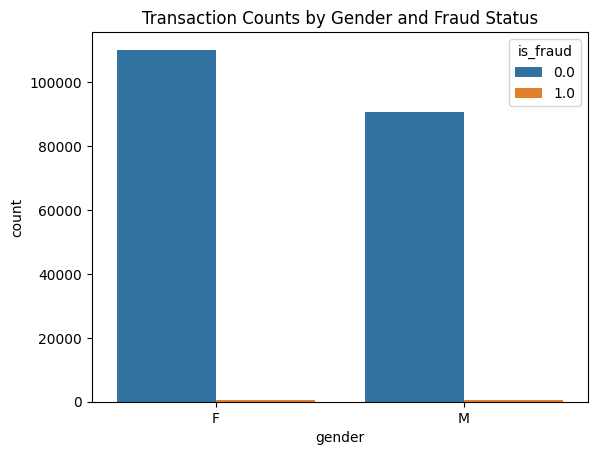

In [ ]:
## The 0 represent male and 1 represent female
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

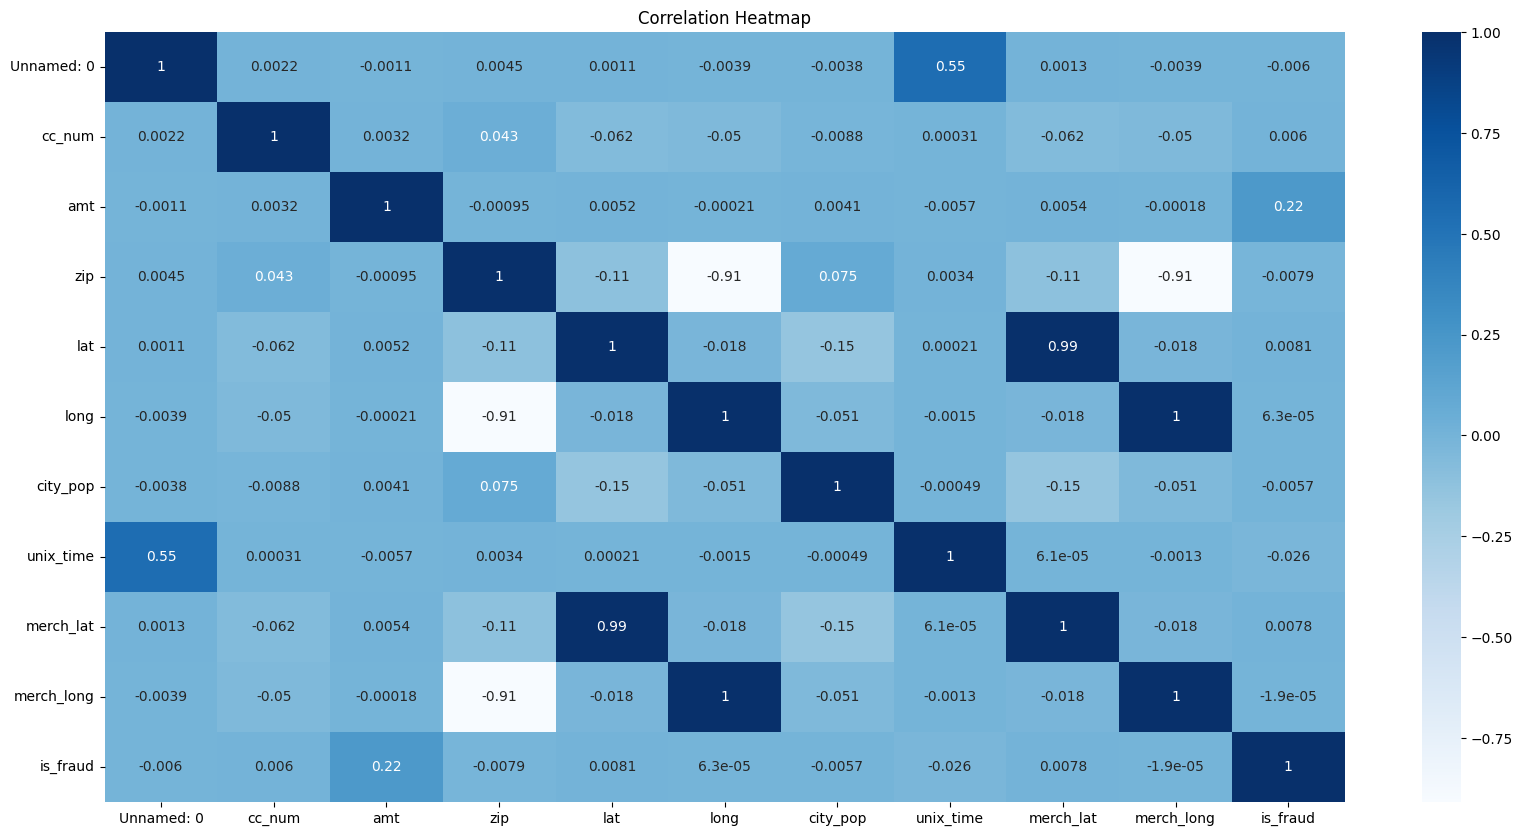

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation calculation
numerical_data = data3.select_dtypes(include=['number'])

plt.figure(figsize=(20,10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = data3.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert timestamp columns to numerical features
for col in X_train.select_dtypes(include=['datetime']).columns:
    X_train[col] = (X_train[col] - X_train[col].min()).dt.days  # Convert to days since the minimum date

# Do the same for X_test
for col in X_test.select_dtypes(include=['datetime']).columns:
    X_test[col] = (X_test[col] - X_test[col].min()).dt.days  # Convert to days since the minimum date

# Identify and handle non-numeric columns
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Example handling (replace with your desired approach):
for col in non_numeric_cols:
    # Option 1: Drop the non-numeric columns
     X_train = X_train.drop(col, axis=1)
     X_test = X_test.drop(col, axis=1)

    # Option 2: One-hot encode categorical columns
    # X_train = pd.get_dummies(X_train, columns=[col], drop_first=True)
    # X_test = pd.get_dummies(X_test, columns=[col], drop_first=True)

# Now fit the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Non-numeric columns: Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'dob', 'trans_num'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     40175
         1.0       0.00      0.00      0.00       230

    accuracy                           0.99     40405
   macro avg       0.50      0.50      0.50     40405
weighted avg       0.99      0.99      0.99     40405

[[40175     0]
 [  230     0]]
Accuracy: 0.9943076351936642


In [ ]:
# Training the model with DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     40175
         1.0       0.58      0.63      0.60       230

    accuracy                           1.00     40405
   macro avg       0.79      0.81      0.80     40405
weighted avg       1.00      1.00      1.00     40405

[[40071   104]
 [   86   144]]
Accuracy: 0.9952976116817226


In [ ]:
# Training the model with logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     40175
         1.0       0.00      0.00      0.00       230

    accuracy                           0.99     40405
   macro avg       0.50      0.50      0.50     40405
weighted avg       0.99      0.99      0.99     40405

[[40175     0]
 [  230     0]]
Accuracy: 0.9943076351936642


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte